In [3]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
#data = pd.read_csv("data/samples/113_t_air.csv")
data = pd.read_csv("data/samples/113_t_air.csv")

In [5]:
data.head()

Unnamed: 0       -0.5       -5.0       -5.5       -6.0       -1.0  \
0           0  37.117196  60.000000  60.000000  61.721990  39.000000   
1           1  40.551127  59.544183  60.000000  60.000000  37.117196   
2           2  50.406880  59.040828  59.544183  60.000000  40.551127   
3           3  64.098514  56.314935  59.040828  59.544183  50.406880   
4           4  83.899753  49.555747  56.314935  59.040828  64.098514   

        -1.5       -2.0       -2.5       -3.0  ...            1           2  \
0  39.320891  42.920150  42.333047  49.555747  ...    64.098514  104.113394   
1  39.000000  39.320891  42.920150  42.333047  ...    83.899753  113.524099   
2  37.117196  39.000000  39.320891  42.920150  ...   104.113394  119.420215   
3  40.551127  37.117196  39.000000  39.320891  ...   113.524099  132.252613   
4  50.406880  40.551127  37.117196  39.000000  ...   119.420215  139.086705   

            3           4  day  day_from_year_start  hour  month  \
0  119.420215  139.086705   19                  263     6      9   
1  132.252613  145.527663   19                  263     7      9   
2  139.086705  149.101525   19                  263     7      9   
3  145.527663  152.448494   19                  263     8      9   
4  149.101525  155.795463   19                  263     8      9   

              time_now  year  
0  2012-09-19 06:30:00  2012  
1  2012-09-19 07:00:00  2012  
2  2012-09-19 07:30:00  2012  
3  2012-09-19 08:00:00  2012  
4  2012-09-19 08:30:00  2012  

[5 rows x 24 columns]

In [6]:
X_df = data[["-6.0", "-5.5", "-5.0", "-4.5", "-4.0", "-3.5", 
     "-3.0", "-2.5", "-2.0", "-1.5", "-1.0", "-0.5", 
     "0", "day_from_year_start", "hour", "month"]]

y_df = data["1 2 3 4".split()]

dates = data["time_now"]

In [7]:
#all features except month
X = X_df.values[:, :-3]
y = y_df.values


In [8]:
# using only 0 as feature and 1 as target
#X = X_df.values[:, 12]
#y = y_df.values

In [9]:
X_df.columns

Index([u'-6.0', u'-5.5', u'-5.0', u'-4.5', u'-4.0', u'-3.5', u'-3.0', u'-2.5',
       u'-2.0', u'-1.5', u'-1.0', u'-0.5', u'0', u'day_from_year_start',
       u'hour', u'month'],
      dtype='object')

In [10]:
X.shape

(60186, 13)

In [11]:
print (X.shape)
print (y.shape)

(60186, 13)
(60186, 4)


In [12]:
scaller_t = MinMaxScaler(feature_range=(0, 1))
scaller_yt = MinMaxScaler(feature_range=(0, 1))
scaller_hour = MinMaxScaler(feature_range=(0, 1))
scaller_day_from = MinMaxScaler(feature_range=(0, 1))

#for 1 feature only
#scaller_t.fit(X)
#scaller_yt.fit(y)

scaller_t.fit(X[:, :13])
scaller_yt.fit(y)
#scaller_hour.fit(X[:, 14])
#scaller_day_from.fit(X[:, 13])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
y_ = np.copy(y)

In [14]:
X[:,:13] = scaller_t.transform(X[:,:13])
#X[:, 13] = scaller_day_from.transform(X[:, 13])
#X[:, 14] = scaller_hour.transform(X[:, 14])

y = scaller_yt.transform(y)

# for 1 feature only
#X = scaller_t.transform(X)

In [15]:
X = X.reshape(X.shape[0], 13, 1)

In [16]:
train_size = 40320
X_train, y_train = np.array(X)[:train_size], np.array(y)[:train_size]
X_test, y_test   = np.array(X)[train_size:], np.array(y)[train_size:]
test_dates = np.array(dates)[train_size:]

In [17]:
mse(y_, scaller_yt.inverse_transform(y))

5.0723721146247089e-28

In [18]:
mse(y_[40320:], scaller_yt.inverse_transform(y_test))

5.6287314207852367e-28

In [19]:
X.shape

(60186, 13, 1)

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40320, 13, 1)
(40320, 4)
(19866, 13, 1)
(19866, 4)


In [44]:
from keras.models import Sequential
from keras import optimizers
#from keras.layers.core import Dropout, Dense
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import BatchNormalization
from keras.layers import LSTM

model = Sequential()
#model.add(BatchNormalization(input_shape=(15, 1)))
model.add(LSTM(8, input_shape=(13, 1)))
model.add(Dropout(0.25))
model.add(Dense(4))
#model.add(Activation('linear'))

# model.add(Dense(15, input_dim=15))
# model.add(Activation('relu'))
# model.add(Dense(100))
# model.add(Activation('relu'))
# model.add(Dense(100))
# model.add(Activation('relu'))
# model.add(Dropout(0.25))
# model.add(Dense(4))
# model.add(Activation('sigmoid'))

#out = Dense(2, name='preds', activation='softmax')(drop)

In [45]:
from keras.callbacks import ModelCheckpoint

checkpoint_cb = ModelCheckpoint('weights.DL_MLP.{val_acc:.4f}.hdf5', 
                                monitor='val_acc', save_best_only=True, verbose=1)

In [46]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

# model.summary()
model.fit(X_train, y_train, epochs=4, batch_size=1, shuffle=False)

Epoch 1/4
40320/40320 [==============================] - 240s - loss: 0.0027   
Epoch 2/4
40320/40320 [==============================] - 237s - loss: 0.0013   
Epoch 3/4
40320/40320 [==============================] - 230s - loss: 0.0013   
Epoch 4/4
40320/40320 [==============================] - 232s - loss: 0.0012   


In [43]:
# All features
y_pred = scaller_yt.inverse_transform(model.predict(X_train))
print 'Train'
print('MSE=',mse(scaller_yt.inverse_transform(y_train), y_pred))
print('MAE=',mae(scaller_yt.inverse_transform(y_train), y_pred))

print '============================================'
print 'Test'
y_pred = scaller_yt.inverse_transform(model.predict(X_test))
print('MSE=', mse(scaller_yt.inverse_transform(y_test), y_pred))
print('MAE=', mae(scaller_yt.inverse_transform(y_test), y_pred))

Train
('MSE=', 11546.559453197046)
('MAE=', 87.645920852436063)
Test
('MSE=', 8008.3118042077549)
('MAE=', 75.34049225320004)


In [32]:
import time
import datetime
s = "2013-03-04 08:30:00"
time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timetuple())

1362371400.0

In [33]:
y_train_pred = scaller_yt.inverse_transform(model.predict(X_train))

t_air_test = scaller_yt.inverse_transform(y_test)[:1000]
t_air_train = scaller_yt.inverse_transform(y_train)[:1000]
t_air_train_pred = y_train_pred[:1000]
t_air_pred = y_pred[:1000]
plot_dates = test_dates[:1000]

In [34]:
for i, date in enumerate(plot_dates):
    plot_dates[i] = time.mktime(datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S").timetuple())

In [35]:
t_air_test.shape
plot_dates.shape

(1000,)

In [36]:
def draw_pred_vs_test(y_pred, y_test):
    #fig, plt = 
    
    #plt.plot(scaler.inverse_transform(dataset))
    
    plt.plot_date(t_air_test, )
    plt.plot(t_air_pred)
    plt.show()

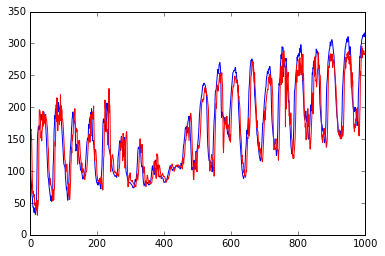

In [38]:
#plt.plot(scaler.inverse_transform(dataset))
#plt.plot_date(plot_dates, t_air_test[:, 0])
plt.plot(t_air_test[:, 2], c="b")
plt.plot(t_air_pred[:, 2], c="r")
plt.show()

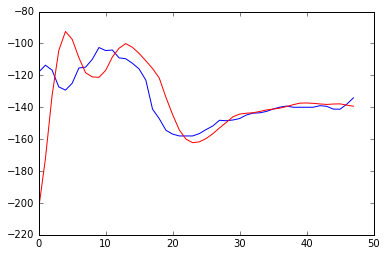

In [420]:
#plt.plot(scaler.inverse_transform(dataset))
#plt.plot_date(plot_dates, t_air_test[:, 0])
plt.plot(t_air_train[:,0], c="b")
plt.plot(t_air_train_pred[:,0]-17, c="r")
plt.show()

In [256]:
y_test

array([[ 115.8246968 ,   88.03577325,   69.71145374,   58.73759647],
       [  98.97574421,   81.18181818,   61.73112948,   49.1707989 ],
       [  88.03577325,   69.71145374,   58.73759647,   43.110011  ],
       ..., 
       [ 243.11678832,  245.79264948,  239.2484815 ,  247.86218302],
       [ 246.88760331,  243.54295154,  242.45975744,  245.44928335],
       [ 245.79264948,  239.2484815 ,  247.86218302,  236.3094195 ]])

In [257]:
model.predict(X_test)

array([[ 52651.41015625,  52363.9609375 ,  51878.98046875,  51191.12109375],
       [ 41257.921875  ,  40669.90625   ,  39934.5859375 ,  39047.22265625],
       [ 28499.31835938,  27718.32421875,  26849.4140625 ,  25887.13085938],
       ..., 
       [ 81690.65625   ,  81481.7265625 ,  80954.09375   ,  80101.6328125 ],
       [ 79205.78125   ,  78930.2578125 ,  78347.1015625 ,  77450.34375   ],
       [ 79811.5703125 ,  79558.46875   ,  78998.1875    ,  78123.71875   ]], dtype=float32)

In [209]:
scaller_yt.inverse_transform(y_train)

array([[  64.09851403,  104.11339359,  119.42021526,  139.0867052 ],
       [  83.89975349,  113.5240992 ,  132.25261324,  145.52766309],
       [ 104.11339359,  119.42021526,  139.0867052 ,  149.10152473],
       ..., 
       [ 167.19207485,  139.38567493,   98.97574421,   81.18181818],
       [ 160.14325069,  115.8246968 ,   88.03577325,   69.71145374],
       [ 139.38567493,   98.97574421,   81.18181818,   61.73112948]])

In [265]:
np.min(X_train)

0.0

In [101]:
model.fit_generator((X_train, y_train),
    steps_per_epoch=50,
    epochs=40,
    callbacks=[checkpoint_cb],
    validation_data=(X_test, y_test),
    validation_steps=100)

Epoch 1/40


Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/user/anaconda2/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/home/user/anaconda2/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/user/anaconda2/lib/python2.7/site-packages/keras/engine/training.py", line 612, in data_generator_task
    generator_output = next(self._generator)
TypeError: tuple object is not an iterator



ValueError: output of generator should be a tuple `(x, y, sample_weight)` or `(x, y)`. Found: None

In [18]:
#ft_model.load_weights("weights.vgg19_Arsen.0.9588.hdf5", by_name=True)

IOError: Unable to open file (Unable to open file: name = 'weights.vgg19_arsen.0.9588.hdf5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [11]:
for i in range(15):
    print "N of layers: ", i
    for layer in ft_model.layers:
        layer.trainable = True 

    for layer in ft_model.layers[:-1]:
        layer.trainable = False

    ft_model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    #ft_model.summary()

    ft_model.fit_generator(train_generator,
        steps_per_epoch=50,
        epochs=40,
        callbacks=[checkpoint_cb],
        validation_data=test_generator,
        validation_steps=100)

N of layers:  4
Epoch 1/40


Exception in thread Thread-3:
Traceback (most recent call last):
  File "/home/user/anaconda2/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/home/user/anaconda2/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/user/anaconda2/lib/python2.7/site-packages/keras/engine/training.py", line 612, in data_generator_task
    generator_output = next(self._generator)
  File "/home/user/anaconda2/lib/python2.7/site-packages/keras/preprocessing/image.py", line 950, in next
    index_array, current_index, current_batch_size = next(self.index_generator)
  File "/home/user/anaconda2/lib/python2.7/site-packages/keras/preprocessing/image.py", line 710, in _flow_index
    current_index = (self.batch_index * batch_size) % n
ZeroDivisionError: integer division or modulo by zero



ValueError: output of generator should be a tuple `(x, y, sample_weight)` or `(x, y)`. Found: None

In [12]:
ft_model.load_weights("weights.vgg19_Arsen.0.9599.hdf5", by_name=True)

In [13]:
import os
from tqdm import tqdm_notebook
from keras.preprocessing.image import load_img, img_to_array


def load_cropped(path):
    img = img_to_array(load_img(path, target_size=(224,224)))[np.newaxis, :]
    return preprocess_imagenet(img)

base_path = '../Data/Test-cropped/'

correct = 0
final_predictions = np.empty((1000, 2))

for k in tqdm_notebook(range(1000)):
    label = 'cats/' if os.path.isfile(base_path + 'cats/' + str(k) + '.jpg') \
                    or os.path.isfile(base_path + 'cats/' + str(k) + '.jpg.nonsquare') \
            else 'dogs/'
    
    current_path = base_path + label
    
    prediction = None
    answer = None
    
    if os.path.isfile(current_path + str(k) + '.jpg'):
        img = load_cropped(current_path + str(k) + '.jpg')
        prediction = ft_model.predict(img)
        answer = prediction.argmax()
        np.copyto(final_predictions[k], prediction)
        
    if os.path.isfile(current_path + str(k) + '.jpg.nonsquare'):
        predictions = []
        predictions.append(ft_model.predict(load_cropped(current_path + str(k) + '_l.jpg')))
        predictions.append(ft_model.predict(load_cropped(current_path + str(k) + '_r.jpg')))

        if os.path.isfile(current_path + str(k) + '_c.jpg'):
            predictions.append(ft_model.predict(load_cropped(current_path + str(k) + '_c.jpg')))

        answer = sum(predictions).argmax()
        np.copyto(final_predictions[k], sum(predictions) / len(predictions))
    
    if answer == (1 if label == 'cats/' else 0):
        correct += 1
        


In [15]:
np.save('../Submissions_Arsen/vgg19_2.npy', final_predictions)
#9600 - 95.3
#958* - 95.7
#9599 - 95.5
print('Accuracy: %.3f' % (correct * 100 / 1000.))

Accuracy: 95.500


In [58]:
answer = final_predictions

with open('../Submissions_Arsen/vgg19_3.csv', 'w') as f:
    f.write('file,label\n')
    for k,y in enumerate(answer):
        f.write(str(k) + '.jpg,' + ('cat' if y == 1 else 'dog') + '\n')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [16]:
#pred_vgg19 = np.load('../Submissions_Arsen/vgg19.npy')
pred_vgg19_2 = np.load('../Submissions_Arsen/vgg19_2.npy')
pred_vgg19_3 = np.load('../Submissions_Arsen/vgg19_3.npy')


answer = (pred_vgg19_2 + pred_vgg19_3).argmax(1)

with open('../Submissions_Arsen/ens2_new.csv', 'w') as f:
    f.write('file,label\n')
    for k,y in enumerate(answer):
        f.write(str(k) + '.jpg,' + ('cat' if y == 1 else 'dog') + '\n')

In [18]:
!cat ../Submissions_Arsen/ens2_new.csv

file,label
0.jpg,cat
1.jpg,cat
2.jpg,cat
3.jpg,cat
4.jpg,dog
5.jpg,dog
6.jpg,dog
7.jpg,dog
8.jpg,cat
9.jpg,cat
10.jpg,cat
11.jpg,cat
12.jpg,cat
13.jpg,dog
14.jpg,dog
15.jpg,dog
16.jpg,dog
17.jpg,cat
18.jpg,dog
19.jpg,dog
20.jpg,dog
21.jpg,cat
22.jpg,dog
23.jpg,dog
24.jpg,cat
25.jpg,dog
26.jpg,cat
27.jpg,dog
28.jpg,dog
29.jpg,dog
30.jpg,dog
31.jpg,cat
32.jpg,dog
33.jpg,cat
34.jpg,cat
35.jpg,dog
36.jpg,cat
37.jpg,cat
38.jpg,cat
39.jpg,dog
40.jpg,cat
41.jpg,dog
42.jpg,dog
43.jpg,dog
44.jpg,cat
45.jpg,cat
46.jpg,dog
47.jpg,dog
48.jpg,cat
49.jpg,cat
50.jpg,dog
51.jpg,dog
52.jpg,cat
53.jpg,dog
54.jpg,cat
55.jpg,cat
56.jpg,cat
57.jpg,dog
58.jpg,dog
59.jpg,cat
60.jpg,dog
61.jpg,dog
62.jpg,cat
63.jpg,cat
64.jpg,cat
65.jpg,dog
66.jpg,cat
67.jpg,cat
68.jpg,dog
69.jpg,dog
70.jpg,dog
71.jpg,cat
72.jpg,cat
73.jpg,dog
74.jpg,cat
75.jpg,cat
76.jpg,dog
77.jpg,dog
78.jpg,cat
79.jpg,dog
80.jpg,dog
81.jpg,cat
82.jpg,dog
83.jpg,cat
84.jpg,dog
85.jpg,cat
86.jpg,cat
87.jpg,dog
88.jpg,cat
89.jpg,cat
90.jpg,ca